# ws 06

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = sns.load_dataset('iris')
# df.head()
df.sample(5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


In [38]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

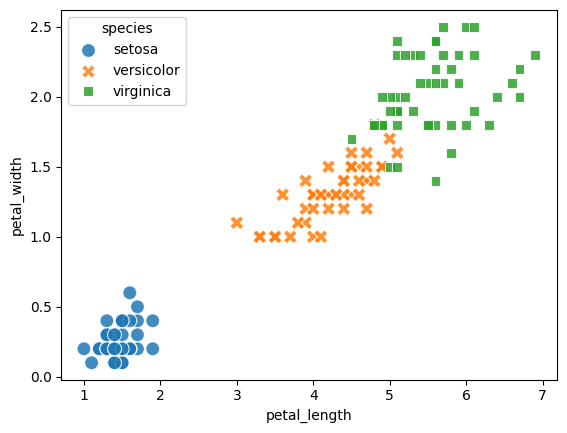

In [39]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', style='species', 
                alpha=0.85, edgecolor='w', s=100)
plt.show()

In [40]:
y, class_names = pd.factorize(df.species, sort=True) 
# print(pd.unique(y))

class_names, y[45:105]

(Index(['setosa', 'versicolor', 'virginica'], dtype='object'),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int64))

In [41]:
class_names, y = np.unique(df.species, return_inverse=True)
class_names, y[45:105]

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int64))

In [42]:
X = df.drop('species', axis=1)
# X.head(6)
X.sample(6, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6


In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [45]:
y_train.shape, y_test.shape 

((112,), (38,))

In [46]:
y_train[:5]

array([1, 2, 2, 0, 2], dtype=int64)

In [47]:
from tensorflow.keras.utils import to_categorical

def one_hot_encode(arr):
    categories, ids = np.unique(arr, return_inverse=True)
    return to_categorical(ids, len(categories))

y_train_1h = one_hot_encode(y_train).astype('int')
y_test_1h = one_hot_encode(y_test).astype('int')

y_test_1h[:4]

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [48]:
y_train_1h = pd.get_dummies(y_train)
y_test_1h = pd.get_dummies(y_test)
y_test_1h.head()

,0,1,2
0,True,False,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,False,True


In [49]:
y_test_1h[:5] 

,0,1,2
0,True,False,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,False,True


In [50]:
y_train_1h.shape, y_test_1h.shape 

((112, 3), (38, 3))

In [51]:
X_train[:4]

array([[ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 1.03800476, -1.28296331,  1.16062026,  0.79067065],
       [ 1.15917263, -0.13197948,  0.99010798,  1.18556721],
       [-0.90068117,  1.01900435, -1.34022653, -1.18381211]])

In [52]:
y_train[:4]

array([1, 2, 2, 0], dtype=int64)

In [53]:
y_train_1h[:4]

,0,1,2
0,False,True,False
1,False,False,True
2,False,False,True
3,True,False,False


# Model

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 


model = Sequential()

hidden_node = 64
 
model.add(Dense(hidden_node, activation='relu', input_shape=(4,))) 

model.add(Dense(3, activation='softmax'))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.output_shape

(None, 3)

In [57]:
model.get_config()

{'name': 'sequential_1',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 4),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_1'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regul

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train_1h, epochs=100, batch_size=8, verbose=1, validation_split=0.25) 

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3217 - loss: 1.1099 - val_accuracy: 0.3214 - val_loss: 0.9942
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3818 - loss: 0.9315 - val_accuracy: 0.5357 - val_loss: 0.9024
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6679 - loss: 0.8370 - val_accuracy: 0.5357 - val_loss: 0.8292
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7677 - loss: 0.6923 - val_accuracy: 0.5357 - val_loss: 0.7763
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.6582 - val_accuracy: 0.5357 - val_loss: 0.7356
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.4575 - val_accuracy: 0.5357 - val_loss: 0.7024
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8201 - loss: 0.5495 - val_accuracy: 0.6071 - val_loss: 0.6666
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8498 - loss: 0.4842 - val_accuracy: 0.6429 - 

In [60]:
score = model.evaluate(X_test, y_test_1h, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07466813176870346
Test accuracy: 0.9736841917037964


In [61]:
model.metrics_names

['loss', 'compile_metrics']

In [62]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.999, 0.001, 0.   ],
       [0.067, 0.923, 0.01 ],
       [0.004, 0.957, 0.04 ],
       [1.   , 0.   , 0.   ]], dtype=float32)

In [63]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

array([0, 1, 1, 0], dtype=int64)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_cat, target_names=class_names))
print(confusion_matrix(y_test, y_pred_cat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


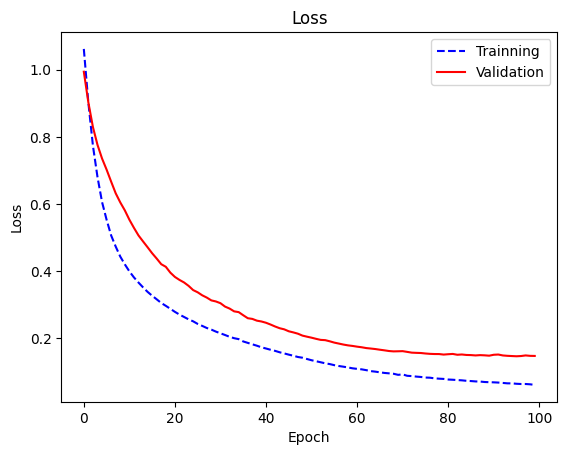

In [65]:
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss')
plt.show()

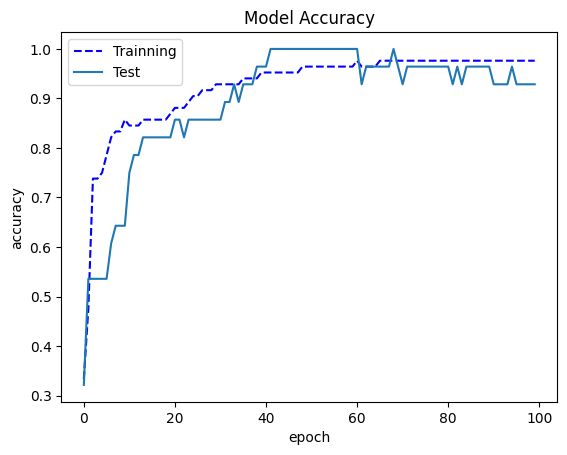

In [66]:
df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [67]:
X_new = [[8.1, 4.0, 5.9, 2.1], # 
         [6.8, 3.6, 3.5, 1.4]] # 

# X_new = [[8.1, 4.0, 5.9, 2.1]]

X_new_sc = sc.transform(X_new)
X_new_sc

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.73435494,  2.16998818,  1.21745768,  1.18556721],
       [ 1.15917263,  1.24920112, -0.14664056,  0.26414192]])

In [68]:
y_pred_pr = model.predict(X_new_sc)
y_pred = np.argmax(y_pred_pr, axis=1)
print(class_names[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
['virginica' 'versicolor']


## Boundary

In [69]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
    
model_no_ohe = Onehot2Int(model)    

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 543us/step


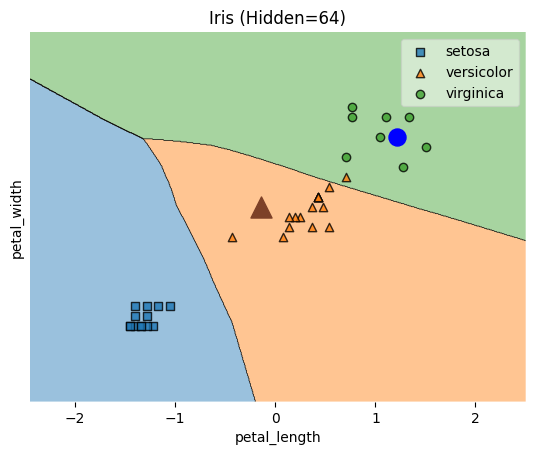

In [70]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 5.5

ax = plot_decision_regions(X_test, np.array(y_test),

                    clf=model_no_ohe, feature_index=[2, 3],  
                    filler_feature_values={0: value, 1: value},
                    filler_feature_ranges={0: width, 1: width},
                    legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Iris (Hidden={})'.format(hidden_node))
# plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(X_new_sc[:,2][y_pred==0], X_new_sc[:,3][y_pred==0], marker='s', s=180, c='b')
plt.scatter(X_new_sc[:,2][y_pred==1], X_new_sc[:,3][y_pred==1], marker='^', s=230, c='#7d4128') # 
plt.scatter(X_new_sc[:,2][y_pred==2], X_new_sc[:,3][y_pred==2], marker='o', s=150, c='b')
plt.show()